In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'size'   : 15}

matplotlib.rc('font', **font)

In [3]:
tests = pd.read_csv('./testing.csv')
cases = pd.read_csv('./cases.csv')

In [19]:
combined = tests[tests['areaName']=='United Kingdom'][['areaType','areaName','areaCode','date','cumTestsByPublishDate']]

In [25]:
def get_cases(date):
    df = cases[cases['areaName']=='United Kingdom']
    return float(np.nan_to_num(df[df['date']==date]['cumCasesByPublishDate']))

combined['cumCasesByPublishDate'] = combined['date'].apply(lambda x: get_cases(x))

In [28]:
combined['normedCases'] = combined.apply(lambda x: x.cumCasesByPublishDate/x.cumTestsByPublishDate,axis=1)

In [45]:
combined = combined.sort_values('date')

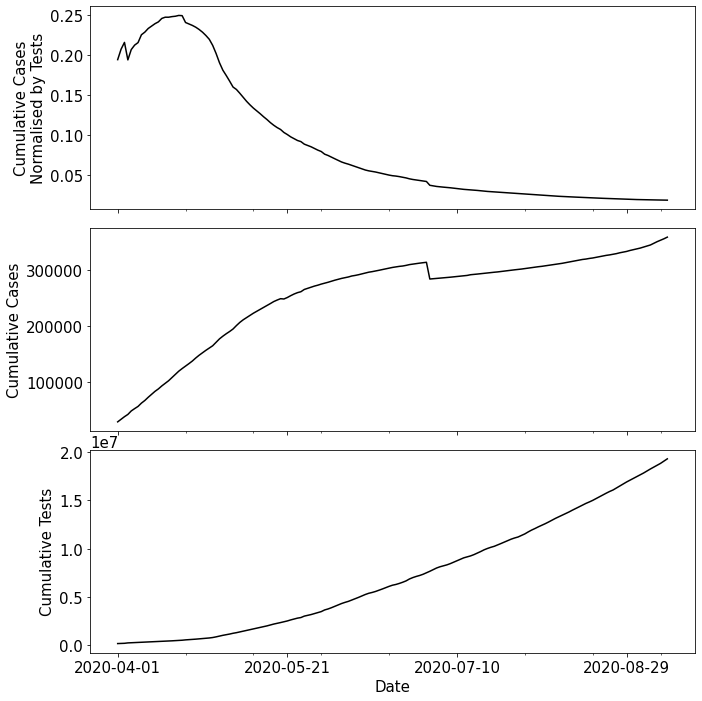

In [111]:
f,(ax1,ax2,ax3) = plt.subplots(3,sharex=True,figsize=(10,10))
combined.sort_values('date').plot(x='date',y='normedCases',ax=ax1,legend=False,color='k')
combined.sort_values('date').plot(x='date',y='cumCasesByPublishDate',ax=ax2,legend=False,color='k')
combined.sort_values('date').plot(x='date',y='cumTestsByPublishDate',ax=ax3,legend=False,color='k')

ax1.set_ylabel('Cumulative Cases\nNormalised by Tests')
ax2.set_ylabel('Cumulative Cases')
ax3.set_ylabel('Cumulative Tests')

ax3.set_xlabel('Date')

ax3.set_xticks(np.arange(len(combined.sort_values('date')['date']))[::50])
ax3.set_xticklabels(combined.sort_values('date')['date'][::50])

plt.tight_layout(h_pad=0)
plt.show()